Using Julia to analyse data about exoplanets

In [ ]:
# import dependencies
using DataFrames
using CSV

In [33]:
# importing a CSV file into Julia
exo_planets = CSV.read("data/PSCompPars_2023.02.18_13.40.14.csv", DataFrame; header=169)
# datasource: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

# Selecting a subset of the exoplanets columns:
# COLUMN pl_name:        Planet Name
# COLUMN hostname:       Host Name
# COLUMN pl_letter:      Planet Letter
# COLUMN sy_snum:        Number of Stars
# COLUMN sy_pnum:        Number of Planets
# COLUMN discoverymethod: Discovery Method
# COLUMN disc_year:      Discovery Year
# COLUMN disc_facility:  Discovery Facility
# COLUMN disc_telescope: Discovery Telescope
# COLUMN pl_rade:        Planet Radius [Earth Radius]
# COLUMN pl_dens:        Planet Density [g/cm**3]
# COLUMN st_teff:        Stellar Effective Temperature [K]
# COLUMN st_rad:         Stellar Radius [Solar Radius]
# COLUMN st_mass:        Stellar Mass [Solar mass]

exo_planets = exo_planets[:, ["pl_name","hostname","pl_letter","sy_snum","sy_pnum",
    "discoverymethod","disc_year","disc_facility","disc_telescope",
    "pl_rade","pl_dens","st_teff","st_rad","st_mass"]]

exo_planets[1:5,:]

Row,pl_name,hostname,pl_letter,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,pl_rade,pl_dens,st_teff,st_rad,st_mass
,String31,String31,String1,Int64,Int64,String31,Int64,String,String,Float64?,Float64?,Float64?,Float64?,Float64?
1,11 Com b,11 Com,b,2,1,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,12.1,19.1,4742.0,19.0,2.7
2,11 UMi b,11 UMi,b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,12.3,13.8,4213.0,29.79,2.78
3,14 And b,14 And,b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,1.88 m Telescope,12.9,3.9,4813.0,11.0,2.2
4,14 Her b,14 Her,b,1,2,Radial Velocity,2002,W. M. Keck Observatory,10 m Keck I Telescope,12.6,7.11,5338.0,0.93,0.91
5,16 Cyg B b,16 Cyg B,b,3,1,Radial Velocity,1996,Multiple Observatories,Multiple Telescopes,13.5,1.26,5750.0,1.13,1.08


In [34]:
# verify the number of explanets is equal to 5250 (correct as of 2023-02-18)
num_pl = size(exo_planets)[1]
size(exo_planets)

(5250, 14)

In [35]:
# characterise the dataset, including number of missing vals
describe(exo_planets)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,pl_name,,11 Com b,,xi Aql b,0,String31
2,hostname,,11 Com,,xi Aql,0,String31
3,pl_letter,,b,,i,0,String1
4,sy_snum,1.10095,1,1.0,4,0,Int64
5,sy_pnum,1.77067,1,1.0,8,0,Int64
6,discoverymethod,,Astrometry,,Transit Timing Variations,0,String31
7,disc_year,2015.73,1992,2016.0,2023,0,Int64
8,disc_facility,,Acton Sky Portal Observatory,,Yunnan Astronomical Observatory,0,String
9,disc_telescope,,0.1 m TESS Telescope,,Very Large Telescope (Antu),0,String


In [42]:
# remove the rows with missing values in them
dropmissing!(exo_planets)

# what percentage of the dataset are we removing by dropping missing vals?
(num_pl - size(exo_planets)[1]) / num_pl * 100

5.6761904761904765

In [43]:
describe(exo_planets)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,pl_name,,11 Com b,,xi Aql b,0,String31
2,hostname,,11 Com,,xi Aql,0,String31
3,pl_letter,,b,,i,0,String1
4,sy_snum,1.09774,1,1.0,4,0,Int64
5,sy_pnum,1.77181,1,1.0,8,0,Int64
6,discoverymethod,,Astrometry,,Transit Timing Variations,0,String31
7,disc_year,2015.73,1995,2016.0,2023,0,Int64
8,disc_facility,,Acton Sky Portal Observatory,,Yunnan Astronomical Observatory,0,String
9,disc_telescope,,0.1 m TESS Telescope,,Very Large Telescope (Antu),0,String


In [48]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

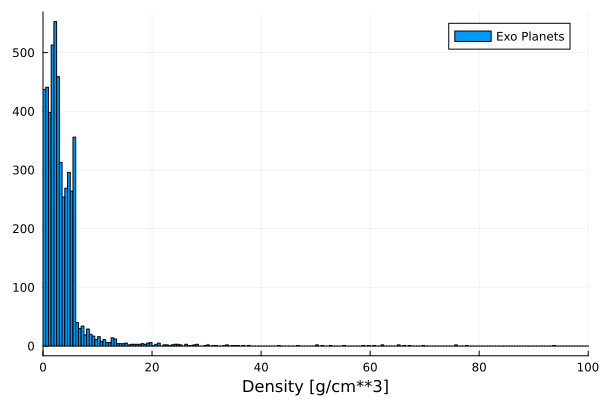

In [60]:
planet_density = exo_planets[!,:pl_dens]

histogram(planet_density, xlabel="Density [g/cm**3]", xlim=[0,100], label="Exo Planets")

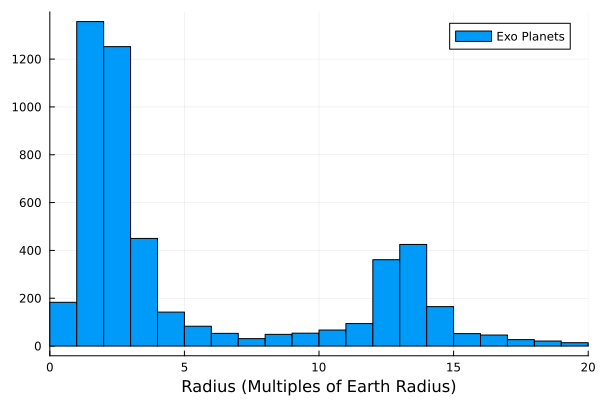

In [70]:
planet_radius = exo_planets[!,:pl_rade]
histogram(planet_radius, xlabel="Radius (Multiples of Earth Radius)", xlim=[0,20], label="Exo Planets")

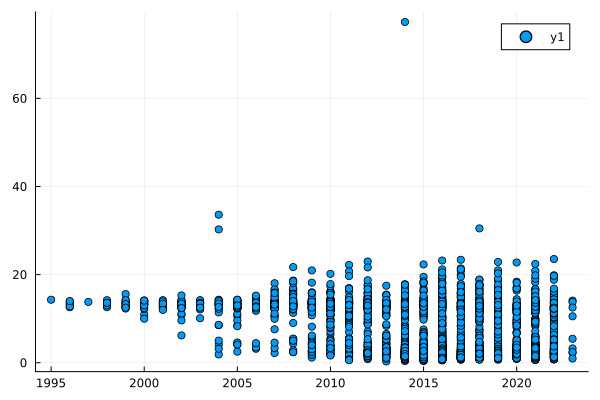

In [74]:
scatter(exo_planets[!,:disc_year],exo_planets[!,:pl_rade])